### Importing the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,recall_score,precision_score,f1_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Problem statement 

In [2]:
# Build the predictive model to predict whether the patient have PCOS or not? 
# the target variable is binary in nature

### Read the data

In [3]:
df1 = pd.read_excel(r"C:\Users\hp\Documents\Projects\CP1\PCOS_data_without_infertility.xlsx",sheet_name="Full_new")

In [4]:
df1.head()                         # top 5 rows

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN


In [5]:
# Target variable is PCOS with two classes viz. Y and N

### Exploratory Data Analysis(EDA )

In [6]:
df1.shape                # Shape indicates that the dataset has 541 observations/records and 45 attributes.

(541, 45)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    float64
 3    Age (yrs)              541 non-null    float64
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    float64
 8   Pulse rate(bpm)         541 non-null    float64
 9   RR (breaths/min)        541 non-null    float64
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    float64
 12  Cycle length(days)      541 non-null    float64
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    fl

In [8]:
# remove the columns 'Patient File No.' and 'SI. No' as they are unique identifier

In [9]:
df1.drop(['Patient File No.','Sl. No'],axis=1,inplace=True)

In [10]:
df1.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,10.48,2.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,11.70,2.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,11.80,2.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,12.00,2.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,10.00,2.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN


In [11]:
df1.shape

(541, 43)

In [12]:
df1.describe()                    #The describe() method shows a summary of the numerical attributes 

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


### Check for the nulls

In [13]:
df1.isnull().sum()[df1.isnull().sum() >0 ]

Marraige Status (Yrs)      1
Fast food (Y/N)            1
Unnamed: 44              539
dtype: int64

In [14]:
# Since, there is only 1 null value in the columns 'Marraige status' and 'Fast Food', we can ignore them. 
# Whilw, the column Unnamed have mostly missing values , its not useful for our analysis purpose.

In [15]:
df1.drop('Unnamed: 44',axis=1,inplace=True)

In [16]:
df1.isnull().sum()[df1.isnull().sum() >0 ]               # all the nulls are removed

Marraige Status (Yrs)    1
Fast food (Y/N)          1
dtype: int64

In [17]:
df1.shape

(541, 42)

### Convert non numeric data to numeric 

In [18]:
# Since in machine learning , we will work only with numerical data, we will convert all variables of object type into numebers.

In [19]:
df1.dtypes[df1.dtypes == 'object']

II    beta-HCG(mIU/mL)    object
AMH(ng/mL)                object
dtype: object

In [20]:
df1['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df1['II    beta-HCG(mIU/mL)'],errors='coerce')
df1['AMH(ng/mL)'] = pd.to_numeric(df1['AMH(ng/mL)'],errors='coerce')

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    float64
 1    Age (yrs)              541 non-null    float64
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    float64
 6   Pulse rate(bpm)         541 non-null    float64
 7   RR (breaths/min)        541 non-null    float64
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    float64
 10  Cycle length(days)      541 non-null    float64
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    float64
 13  No. of aborptions       541 non-null    float64
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [22]:
df1.dtypes[df1.dtypes == 'object']                  # All columns are converted to numbers.

Series([], dtype: object)

In [23]:
df1.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [24]:
# correlation

In [25]:
df1.corr()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),1.000000,-0.168513,0.211938,0.068254,0.199534,0.036433,0.091821,0.036928,0.087170,0.401644,...,0.286077,0.377933,0.065337,0.007942,0.038032,0.603346,0.648327,0.132992,0.097690,0.106648
Age (yrs),-0.168513,1.000000,-0.029734,-0.119819,0.021261,-0.010954,0.045831,0.087382,-0.021558,-0.085943,...,-0.032921,-0.037694,-0.025911,0.073587,0.066788,-0.110793,-0.159395,-0.016352,-0.079250,-0.104238
Weight (Kg),0.211938,-0.029734,1.000000,0.420098,0.901675,0.072682,0.019983,0.043614,0.009594,0.200758,...,0.063983,0.162015,-0.068236,0.027608,0.131402,0.173751,0.124290,-0.021368,-0.073207,-0.010100
Height(Cm),0.068254,-0.119819,0.420098,1.000000,-0.006878,0.040825,-0.074339,-0.029459,0.024378,-0.017336,...,0.061129,0.032418,0.012943,-0.067959,0.011116,0.106189,0.075358,-0.026705,0.059426,-0.054035
BMI,0.199534,0.021261,0.901675,-0.006878,1.000000,0.061939,0.050529,0.061905,0.003512,0.232828,...,0.045656,0.159279,-0.080192,0.069491,0.139975,0.142886,0.104204,-0.011610,-0.111522,0.009349
Blood Group,0.036433,-0.010954,0.072682,0.040825,0.061939,1.000000,0.047572,-0.023766,-0.001759,0.123724,...,0.039029,-0.035090,0.064035,0.030898,0.054014,0.061332,0.013974,-0.035667,-0.015725,-0.015335
Pulse rate(bpm),0.091821,0.045831,0.019983,-0.074339,0.050529,0.047572,1.000000,0.303804,-0.052048,0.101006,...,-0.003039,0.059804,-0.038881,-0.025510,0.007623,0.040390,0.049182,-0.048356,-0.034202,-0.041241
RR (breaths/min),0.036928,0.087382,0.043614,-0.029459,0.061905,-0.023766,0.303804,1.000000,-0.040487,0.018324,...,0.029242,0.135479,-0.047451,0.017323,0.052631,0.069731,0.012441,-0.031051,-0.021893,-0.063930
Hb(g/dl),0.087170,-0.021558,0.009594,0.024378,0.003512,-0.001759,-0.052048,-0.040487,1.000000,0.036683,...,0.053794,0.076293,0.011643,0.053020,0.000606,0.061195,0.072958,0.032617,0.024335,-0.066446
Cycle(R/I),0.401644,-0.085943,0.200758,-0.017336,0.232828,0.123724,0.101006,0.018324,0.036683,1.000000,...,0.121380,0.206062,-0.004989,0.054910,0.081345,0.296518,0.251575,0.033450,0.016007,0.043614


In [26]:
correlation_with_target = df1.corr()['PCOS (Y/N)'].abs().sort_values(ascending=False)

In [27]:
correlation_with_target

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.377933
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.263863
Weight (Kg)               0.211938
BMI                       0.199534
Cycle length(days)        0.178480
Hair loss(Y/N)            0.172879
 Age (yrs)                0.168513
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Marraige Status (Yrs)     0.112897
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
No. of aborptions         0.057158
RBS(mg/dl)          

### Analysis using different plots

In [28]:
# 1. Distribution of PCOS Cases Across Age Groups

In [29]:
# Define age group bins and labels

age_groups = [0,18,25,35,45,float('inf')]
age_labels = ['<18','18-25','26-35','36-45','45+']
df1['Age Group'] = pd.cut(df1[' Age (yrs)'],bins = age_groups,labels = age_labels)

In [30]:
# Categorize the 'Age (yrs)' column into age groups

age_group_counts = df1.groupby(['Age Group', 'PCOS (Y/N)']).size().unstack()
type(age_group_counts)

pandas.core.frame.DataFrame

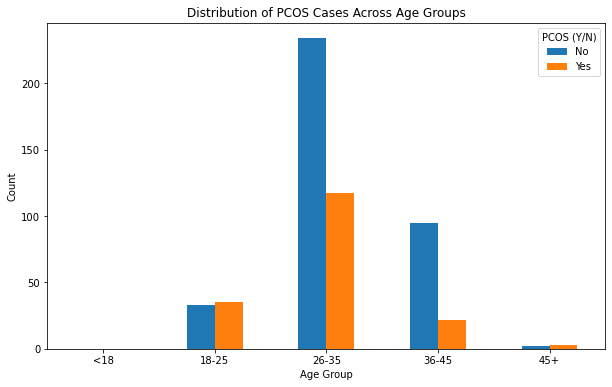

In [31]:
age_group_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of PCOS Cases Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='PCOS (Y/N)', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

In [32]:
# It can be observed from above plot that PCOS affects mainly the age group of 26-35.

In [33]:
# 2. Distribution analysis for numerical attributes

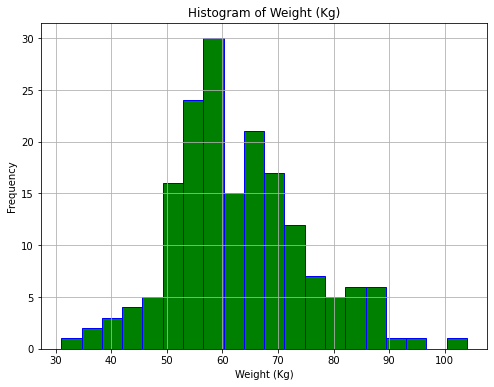

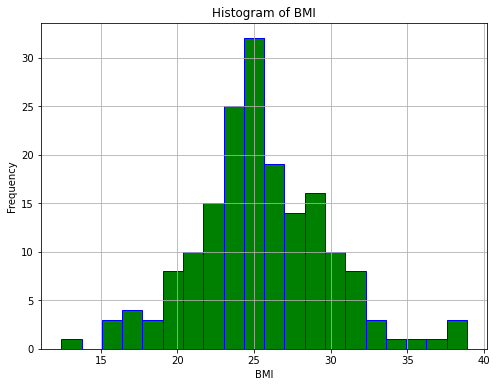

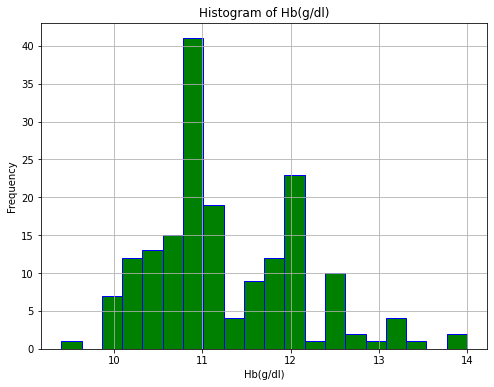

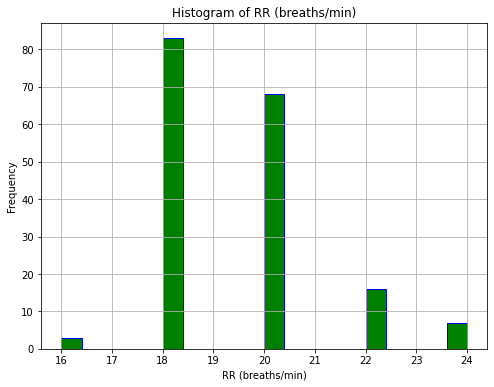

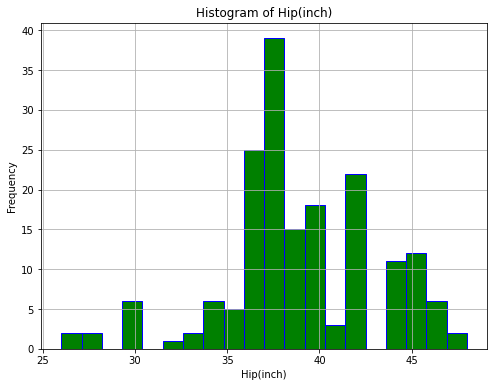

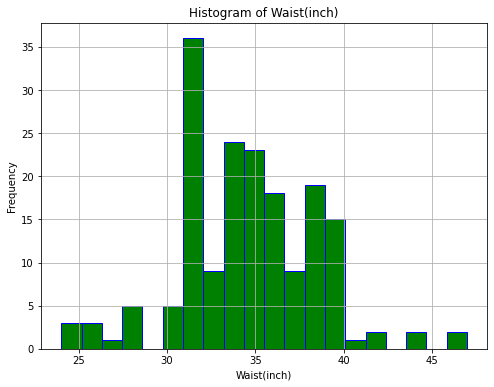

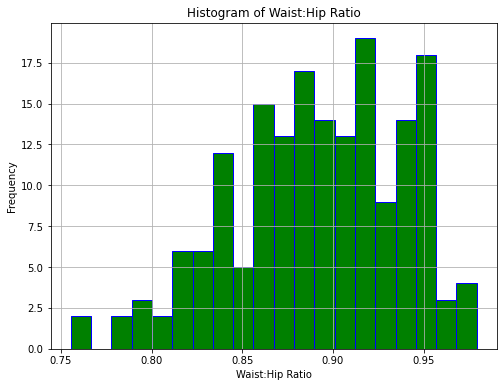

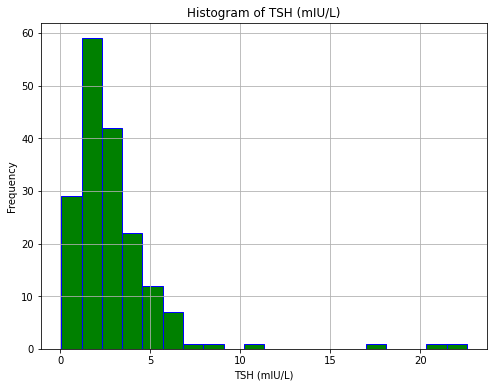

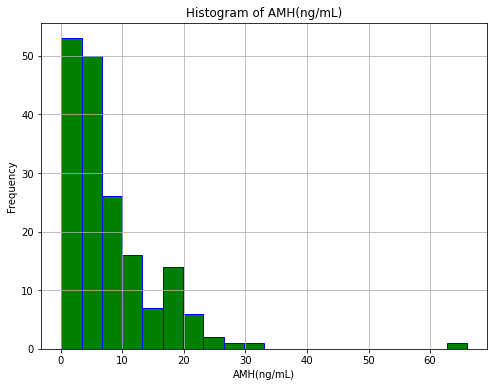

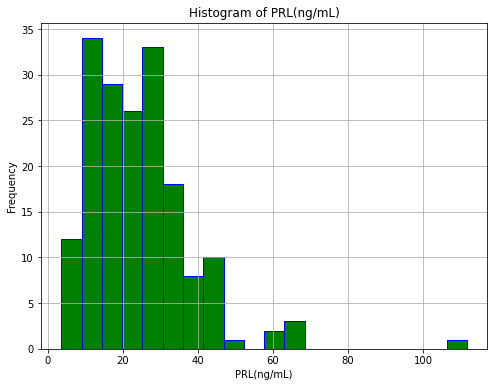

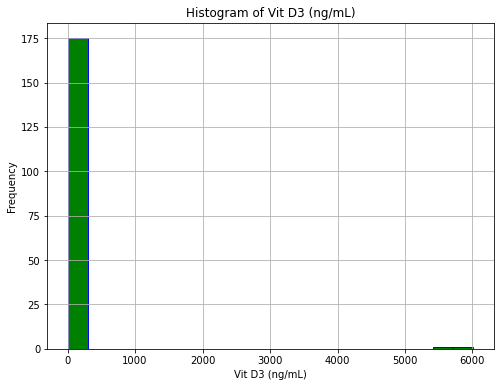

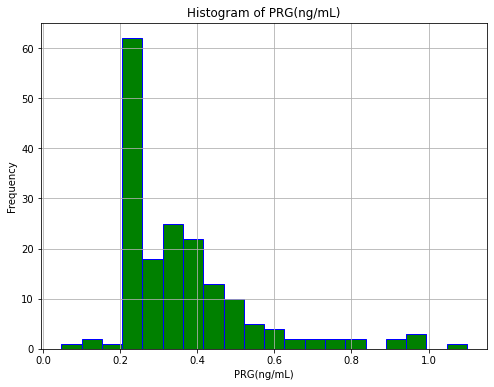

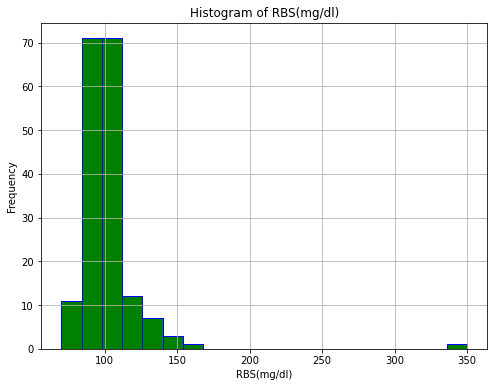

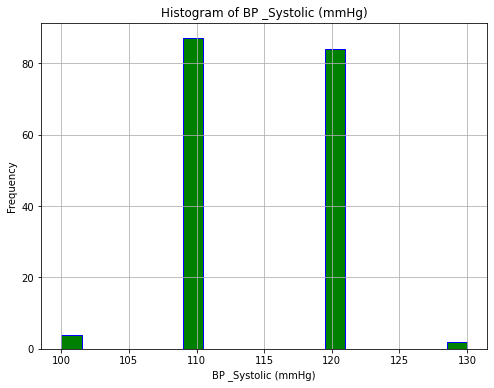

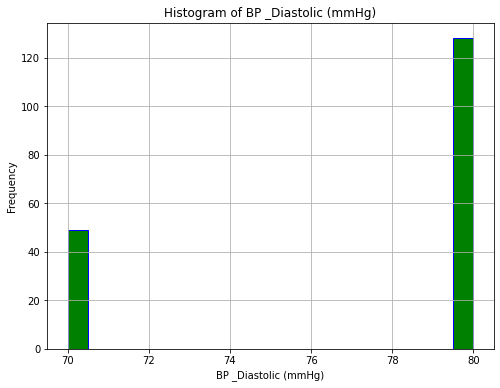

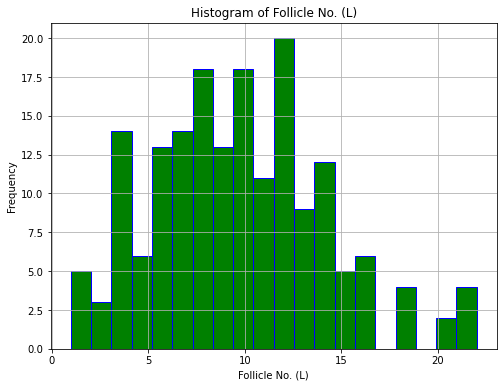

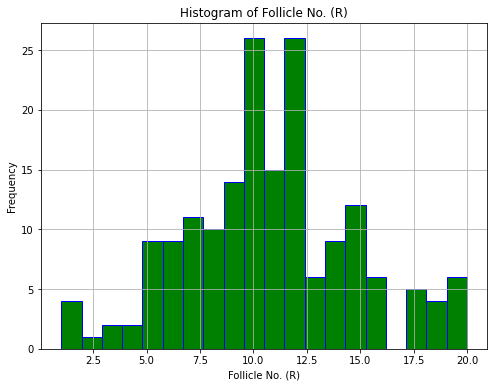

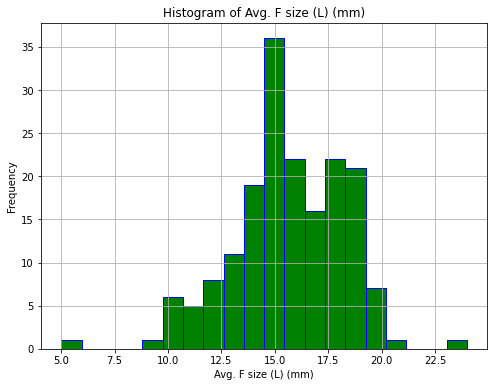

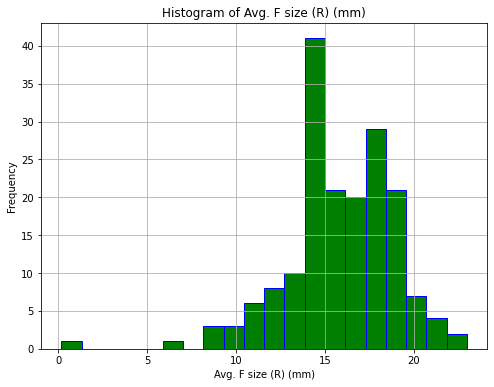

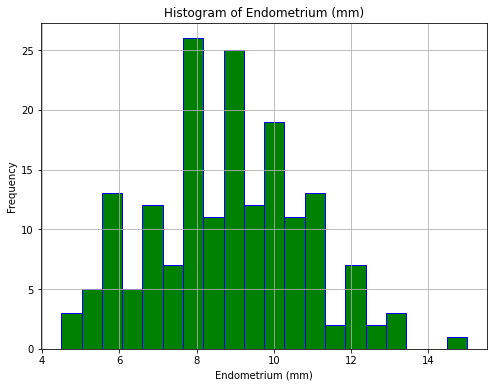

In [34]:
# List of numerical attributes for distribution analysis
numerical_attributes = ['Weight (Kg)', 'BMI', 'Hb(g/dl)','RR (breaths/min)',
                        'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
                        'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
                        'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
                        'Endometrium (mm)']
df1_pcos = df1[df1['PCOS (Y/N)']==1]
# Create histograms for each numerical attribute
for attribute in numerical_attributes:
    plt.figure(figsize=(8, 6))
    plt.hist(df1_pcos[attribute], bins=20, color='green', edgecolor='blue')
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### Feature Selection

In [35]:
top_10_features = correlation_with_target[0:11]       # these 10 variables are significantly correlated to the target variable.
print(top_10_features)

PCOS (Y/N)              1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Fast food (Y/N)         0.377933
Pimples(Y/N)            0.286077
AMH(ng/mL)              0.263863
Weight (Kg)             0.211938
Name: PCOS (Y/N), dtype: float64


In [36]:
df1_new = df1[['PCOS (Y/N)','Follicle No. (R)','Follicle No. (L)','Skin darkening (Y/N)','hair growth(Y/N)','Weight gain(Y/N)','Cycle(R/I)','Fast food (Y/N)','Pimples(Y/N)','AMH(ng/mL)','Weight (Kg)']]

In [37]:
df1_new.isnull().sum()

PCOS (Y/N)              0
Follicle No. (R)        0
Follicle No. (L)        0
Skin darkening (Y/N)    0
hair growth(Y/N)        0
Weight gain(Y/N)        0
Cycle(R/I)              0
Fast food (Y/N)         1
Pimples(Y/N)            0
AMH(ng/mL)              1
Weight (Kg)             0
dtype: int64

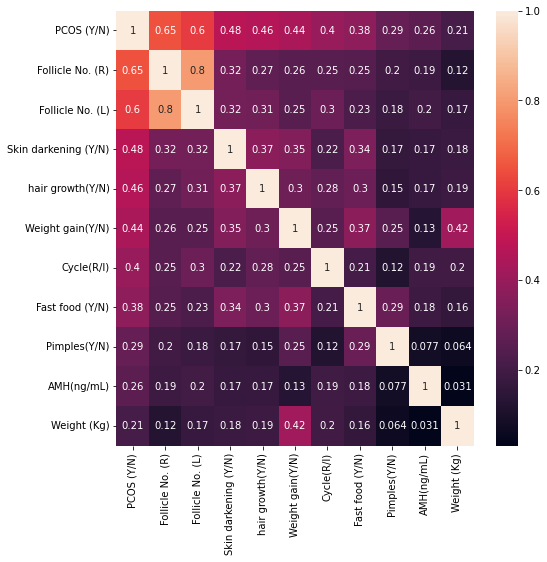

In [38]:
plt.figure(figsize=(8,8))
sns.heatmap(df1_new.corr(),annot=True)
plt.show()

In [39]:
df1_new['PCOS (Y/N)'].value_counts()

0.0    364
1.0    177
Name: PCOS (Y/N), dtype: int64

In [40]:
df1_new.dropna(inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14864\2117126546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_new.dropna(inplace=True)


In [41]:
df1_new.isnull().sum()

PCOS (Y/N)              0
Follicle No. (R)        0
Follicle No. (L)        0
Skin darkening (Y/N)    0
hair growth(Y/N)        0
Weight gain(Y/N)        0
Cycle(R/I)              0
Fast food (Y/N)         0
Pimples(Y/N)            0
AMH(ng/mL)              0
Weight (Kg)             0
dtype: int64

In [42]:
df1_new.columns

Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)', 'Fast food (Y/N)', 'Pimples(Y/N)', 'AMH(ng/mL)',
       'Weight (Kg)'],
      dtype='object')

### Detection of Outliers

In [43]:
def outliers(df,col,k):   
    mean = df[col].mean()
    global df1
    sd = df[col].std()    
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]       
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape) 
    print("Number of outliers == >"   ,  df.shape[0]  - df1.shape[0])

In [44]:
for cols in df1_new.columns:
    print("Name of the column:",cols)
    outliers(df1_new,cols, 3)
    print("------------")

Name of the column: PCOS (Y/N)
(539, 11)
Number of outliers == > 0
------------
Name of the column: Follicle No. (R)
(533, 11)
Number of outliers == > 6
------------
Name of the column: Follicle No. (L)
(533, 11)
Number of outliers == > 6
------------
Name of the column: Skin darkening (Y/N)
(539, 11)
Number of outliers == > 0
------------
Name of the column: hair growth(Y/N)
(539, 11)
Number of outliers == > 0
------------
Name of the column: Weight gain(Y/N)
(539, 11)
Number of outliers == > 0
------------
Name of the column: Cycle(R/I)
(539, 11)
Number of outliers == > 0
------------
Name of the column: Fast food (Y/N)
(539, 11)
Number of outliers == > 0
------------
Name of the column: Pimples(Y/N)
(539, 11)
Number of outliers == > 0
------------
Name of the column: AMH(ng/mL)
(533, 11)
Number of outliers == > 6
------------
Name of the column: Weight (Kg)
(536, 11)
Number of outliers == > 3
------------


In [45]:
# As there are very less number of outliers we can ignore them.

### Sampling

In [46]:
train,test = train_test_split(df1_new,test_size=0.2,random_state=42)           # 80% - 20% sampling is done here

In [47]:
train

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),AMH(ng/mL),Weight (Kg)
463,0.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,10.00,45.0
232,1.0,14.0,16.0,1.0,1.0,0.0,4.0,1.0,1.0,13.60,55.0
448,0.0,7.0,9.0,1.0,1.0,1.0,4.0,1.0,0.0,9.10,71.5
451,1.0,18.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.98,44.0
450,1.0,16.0,20.0,0.0,1.0,1.0,2.0,1.0,1.0,0.91,69.0
...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,6.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,2.58,61.0
106,0.0,4.0,6.0,1.0,1.0,1.0,4.0,0.0,1.0,3.90,60.0
271,0.0,3.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,3.20,55.7
437,1.0,12.0,9.0,1.0,0.0,1.0,4.0,1.0,1.0,8.00,71.0


In [48]:
train_x = train.iloc[: , 1::]
train_y = train.iloc[: , 0 ]

In [49]:
train_x.head()

,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),AMH(ng/mL),Weight (Kg)
463,1.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,10.00,45.0
232,14.0,16.0,1.0,1.0,0.0,4.0,1.0,1.0,13.60,55.0
448,7.0,9.0,1.0,1.0,1.0,4.0,1.0,0.0,9.10,71.5
451,18.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.98,44.0
450,16.0,20.0,0.0,1.0,1.0,2.0,1.0,1.0,0.91,69.0


In [50]:
train_y.head()

463    0.0
232    1.0
448    0.0
451    1.0
450    1.0
Name: PCOS (Y/N), dtype: float64

In [51]:
test_x = test.iloc[: , 1::]
test_y = test.iloc[: , 0 ]

In [52]:
train_x.shape , train_y.shape , test_x.shape , test_y.shape

((431, 10), (431,), (108, 10), (108,))

## Model building

# Logistic Regression

#### 1.  Logistic regression is a machine learning method used for classification tasks.
#### 2.  The target variable in logistic regression is binary ( coded as 0 or 1).
#### 3.  Logistic regression uses a "Sigmoid function" or "Logistic function" instead of a linear function.

## Types of logistic regression:

* Binary Logistic Regression- two or binary outcomes like yes or no
* Multinomial Logistic Regression- three or more outcomes like first, second, and third class or no class degree
* Ordinal Logistic Regression- three or more like multinomial logistic regression but here with the order like customer rating    in the supermarket from 1 to 5.

In [53]:
logreg = LogisticRegression()

In [54]:
logreg.fit(train_x,train_y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
# Prediction on test dataset

In [56]:
pred_logi = logreg.predict(test_x)

In [57]:
pred_logi

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1.])

In [58]:
test_y

488    0.0
73     0.0
351    1.0
86     0.0
459    0.0
      ... 
93     0.0
327    0.0
181    0.0
333    0.0
540    1.0
Name: PCOS (Y/N), Length: 108, dtype: float64

In [59]:
# Prediction on train dataset

In [60]:
pred_logi_train = logreg.predict(train_x)

In [61]:
pred_logi_train

array([0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [62]:
# confusion matrix

In [63]:
conf_matrix = confusion_matrix(test_y,pred_logi)             # from left to right you have actual and from top to bottom predicted
conf_matrix

array([[74,  5],
       [ 7, 22]], dtype=int64)

In [64]:
# Accuracy on test dataset

In [65]:
acc_logi = accuracy_score(test_y,pred_logi)*100
print("Accuracy_logi:", acc_logi)

Accuracy_logi: 88.88888888888889


In [66]:
# Accuracy on train dataset

In [67]:
acc_logi_train = accuracy_score(train_y,pred_logi_train)*100
print("Accuracy_logi:", acc_logi_train)

Accuracy_logi: 91.87935034802784


In [68]:
# There is no much difference between the accuracy on train and test datasets.
# Hence, model is not overfitted.

In [69]:
# recall

In [70]:
recall_logi = recall_score(test_y,pred_logi)
recall_logi

0.7586206896551724

In [71]:
# Precision

In [72]:
precision_logi = precision_score(test_y , pred_logi)
precision_logi

0.8148148148148148

In [73]:
# f1 score

In [74]:
f1_logi = f1_score(test_y , pred_logi)
f1_logi

0.7857142857142857

In [75]:
# classification report

In [76]:
classification_rep = classification_report(test_y,pred_logi)
print(classification_rep)

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92        79
         1.0       0.81      0.76      0.79        29

    accuracy                           0.89       108
   macro avg       0.86      0.85      0.86       108
weighted avg       0.89      0.89      0.89       108



In [77]:
# auroc curve

In [78]:
pred_logi = logreg.predict(test_x)
pred_prob  = logreg.predict_proba(test_x)

In [79]:
pred_logi

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1.])

In [80]:
pred_prob                               # prediction probabilities

array([[7.63226843e-01, 2.36773157e-01],
       [9.84544878e-01, 1.54551215e-02],
       [3.01627362e-01, 6.98372638e-01],
       [6.11796604e-01, 3.88203396e-01],
       [9.97959457e-01, 2.04054297e-03],
       [9.92200934e-01, 7.79906563e-03],
       [8.58012530e-01, 1.41987470e-01],
       [9.83986611e-01, 1.60133893e-02],
       [8.01585578e-01, 1.98414422e-01],
       [8.34054013e-01, 1.65945987e-01],
       [9.77184462e-01, 2.28155383e-02],
       [9.95865545e-01, 4.13445507e-03],
       [9.98065128e-01, 1.93487233e-03],
       [9.97783426e-01, 2.21657373e-03],
       [9.87957530e-01, 1.20424703e-02],
       [7.48332579e-01, 2.51667421e-01],
       [5.25306744e-02, 9.47469326e-01],
       [9.87508012e-01, 1.24919875e-02],
       [4.39639970e-01, 5.60360030e-01],
       [9.62755268e-01, 3.72447322e-02],
       [9.97549935e-01, 2.45006545e-03],
       [2.90928677e-03, 9.97090713e-01],
       [9.83349320e-01, 1.66506803e-02],
       [3.50072011e-01, 6.49927989e-01],
       [1.859570

In [81]:
# for 1st observation probability of class 0 is 0.763226843 and probability of class 1 is 0.236773`57 . 
# probability for class 0 is more than class 1 . So 1st observation is predicted as 0
# if we add these 2 values we get 1

In [82]:
roc_score = roc_auc_score(test_y ,pred_logi)                      # this gives area under the curve (AUROC value)
roc_score

0.8476647752073331

In [83]:
# plotting the curve

In [84]:
fpr , tpr , threshold = roc_curve(test_y , pred_prob[: ,1])

Text(0.5, 1.0, 'AUROC curve')

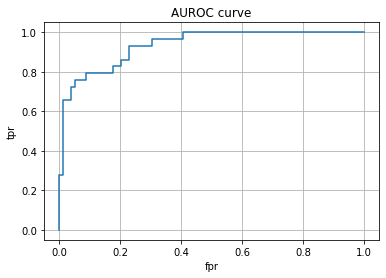

In [85]:
plt.plot(fpr,tpr)
plt.grid()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("AUROC curve")

In [86]:
# **Conclusion  for Logistic Regression :**

#The model performs well for class 0 (the negative class) with high precision (91%), recall (94%), and F1-score (92%).
#The model performs reasonably well for class 1 (the positive class) with a decent precision (81%) and F1-score (79%), but the recall (76%) is slightly lower, indicating that some positive samples are being misclassified as negative.

# Decision Tree

#### 1. It is a supervised learning algorithm
#### 2. It is a classification algorithm
#### 3. Target variable can be binary or multiclass

In [88]:
dt = DecisionTreeClassifier()

In [89]:
dt.fit(train_x ,train_y)

DecisionTreeClassifier()

In [90]:
# prediction on test dataset

In [91]:
pred_dt = dt.predict(test_x)

In [92]:
pred_dt

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1.])

In [93]:
test_y

488    0.0
73     0.0
351    1.0
86     0.0
459    0.0
      ... 
93     0.0
327    0.0
181    0.0
333    0.0
540    1.0
Name: PCOS (Y/N), Length: 108, dtype: float64

In [94]:
# prediction on train dataset

In [95]:
pred_dt_train = dt.predict(train_x)

In [96]:
pred_dt_train

array([0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [97]:
# confusion matrix

In [98]:
tab1 = confusion_matrix(test_y , pred_dt)                 # from left to right you have actual and from top to bottom predicted
tab1

array([[66, 13],
       [ 7, 22]], dtype=int64)

In [99]:
# Accuracy on test dataset

In [100]:
acc_dt = accuracy_score(test_y , pred_dt) *100
print("Accuracy_dt:",acc_dt)

Accuracy_dt: 81.48148148148148


In [101]:
# Accuracy on train dataset

In [102]:
acc_dt_train = accuracy_score(train_y , pred_dt_train) *100
print("Accuracy_dt:",acc_dt_train)

Accuracy_dt: 100.0


In [103]:
# Model is overfitted.
# To avoid overfitting let's do hyperparameter tunning

In [182]:
dt1 = DecisionTreeClassifier(criterion= "entropy",max_depth=4, min_samples_split=2)

In [183]:
dt1.fit(train_x ,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [184]:
# prediction on test dataset

In [185]:
pred_dt1 = dt1.predict(test_x)

In [186]:
pred_dt1

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1.])

In [187]:
test_y

488    0.0
73     0.0
351    1.0
86     0.0
459    0.0
      ... 
93     0.0
327    0.0
181    0.0
333    0.0
540    1.0
Name: PCOS (Y/N), Length: 108, dtype: float64

In [188]:
# prediction on train dataset

In [189]:
pred_dt1_train = dt1.predict(train_x)

In [190]:
pred_dt1_train

array([0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [191]:
# confusion matrix

In [192]:
tab1 = confusion_matrix(test_y , pred_dt1)                 # from left to right you have actual and from top to bottom predicted
tab1

array([[73,  6],
       [ 9, 20]], dtype=int64)

In [193]:
# Accuracy on test dataset

In [194]:
acc_dt = accuracy_score(test_y , pred_dt1) *100
print("Accuracy_dt:",acc_dt)

Accuracy_dt: 86.11111111111111


In [195]:
# Accuracy on train dataset

In [196]:
acc_dt_train = accuracy_score(train_y , pred_dt1_train) *100
print("Accuracy_dt:",acc_dt_train)

Accuracy_dt: 91.1832946635731


In [197]:
# Now there is no much difference between the accuracy on train and test datasets.
# Hence, model is not overfitted.

In [84]:
# Recall

In [199]:
recall_dt = recall_score(test_y , pred_dt1)
recall_dt

0.6896551724137931

In [200]:
# Precision

In [201]:
precision_dt = precision_score(test_y , pred_dt1)
precision_dt

0.7692307692307693

In [202]:
# f1 score

In [203]:
f1_dt = f1_score(test_y , pred_dt1)
f1_dt

0.7272727272727274

In [204]:
classification_rep = classification_report(test_y, pred_dt1)
print(classification_rep)

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91        79
         1.0       0.77      0.69      0.73        29

    accuracy                           0.86       108
   macro avg       0.83      0.81      0.82       108
weighted avg       0.86      0.86      0.86       108



### Random Forest 

#### 1. It is a supervised algorithm
#### 2. RF uses three concepts: Ensemble, Bootstrapping and Bagging

In [205]:
rfc = RandomForestClassifier()

In [206]:
rfc.fit(train_x ,train_y)

RandomForestClassifier()

In [207]:
pred_rfc = rfc.predict(test_x)
pred_rfc

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1.])

In [212]:
pred_rfc_train = rfc.predict(train_x)
pred_rfc_train

array([0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [213]:
tab1 = confusion_matrix(test_y,pred_rfc)
tab1

array([[75,  4],
       [ 7, 22]], dtype=int64)

In [215]:
# Accuracy on test dataset

In [216]:
acc_rf = accuracy_score(test_y , pred_rfc)*100
print("Accuracy_rf:",acc_rf)

Accuracy_rf: 89.81481481481481


In [ ]:
# Accuracy on test dataset

In [217]:
acc_rf_train = accuracy_score(train_y , pred_rfc_train)*100
print("Accuracy_rf:",acc_rf_train)

Accuracy_rf: 100.0


In [ ]:
# Model is overfitted.
# To avoid overfitting let's do hyperparameter tunning

In [240]:
rfc = RandomForestClassifier(n_estimators=50,
    criterion='entropy',
    max_depth=5,
    min_samples_split=2)

In [241]:
rfc.fit(train_x ,train_y)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=50)

In [242]:
pred_rfc = rfc.predict(test_x)
pred_rfc

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1.])

In [243]:
pred_rfc_train = rfc.predict(train_x)
pred_rfc_train

array([0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [244]:
tab1 = confusion_matrix(test_y,pred_rfc)
tab1

array([[76,  3],
       [ 8, 21]], dtype=int64)

In [245]:
# Accuracy on test dataset

In [246]:
acc_rf = accuracy_score(test_y , pred_rfc)*100
print("Accuracy_rf:",acc_rf)

Accuracy_rf: 89.81481481481481


In [247]:
# Accuracy on test dataset

In [248]:
acc_rf_train = accuracy_score(train_y , pred_rfc_train)*100
print("Accuracy_rf:",acc_rf_train)

Accuracy_rf: 95.59164733178655


In [249]:
# Now there is no much difference between the accuracy on train and test datasets.
# Hence, model is not overfitted.

In [250]:
# Recall

In [251]:
recall_rf = recall_score(test_y , pred_rfc)
recall_rf

0.7241379310344828

In [252]:
# Precision

In [253]:
precision_rf = precision_score(test_y , pred_rfc)
precision_rf

0.875

In [254]:
# f1 score

In [255]:
f1_rf = f1_score(test_y , pred_rfc)
f1_rf

0.7924528301886793

In [256]:
print(classification_report(test_y , pred_rfc))                 # support : total records of that category

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93        79
         1.0       0.88      0.72      0.79        29

    accuracy                           0.90       108
   macro avg       0.89      0.84      0.86       108
weighted avg       0.90      0.90      0.89       108



In [257]:
# Comaprison of the models

In [258]:
pd.DataFrame({'model':['Logistic Regression','Decision Tree','Random Forest'],
             'Accuracy':[acc_logi,acc_dt,acc_rf],
             'Recall':[recall_logi,recall_dt,recall_rf],
             'Precision':[precision_logi,precision_dt,precision_rf],
             'f1 score':[f1_logi,f1_dt,f1_rf]})

,model,Accuracy,Recall,Precision,f1 score
0,Logistic Regression,88.888889,0.758621,0.814815,0.785714
1,Decision Tree,86.111111,0.689655,0.769231,0.727273
2,Random Forest,89.814815,0.724138,0.875000,0.792453


In [259]:
# conclusion

In [ ]:
# So by looking at the above output :
# Random forest model gives best results